# Tarea derivadas


Natali André Julio Beltran - 1098807231\
Brayan Alejandro Murillo González - 1007338060

In [ ]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from sympy import init_printing
from scipy import interpolate
import matplotlib.pylab as plt


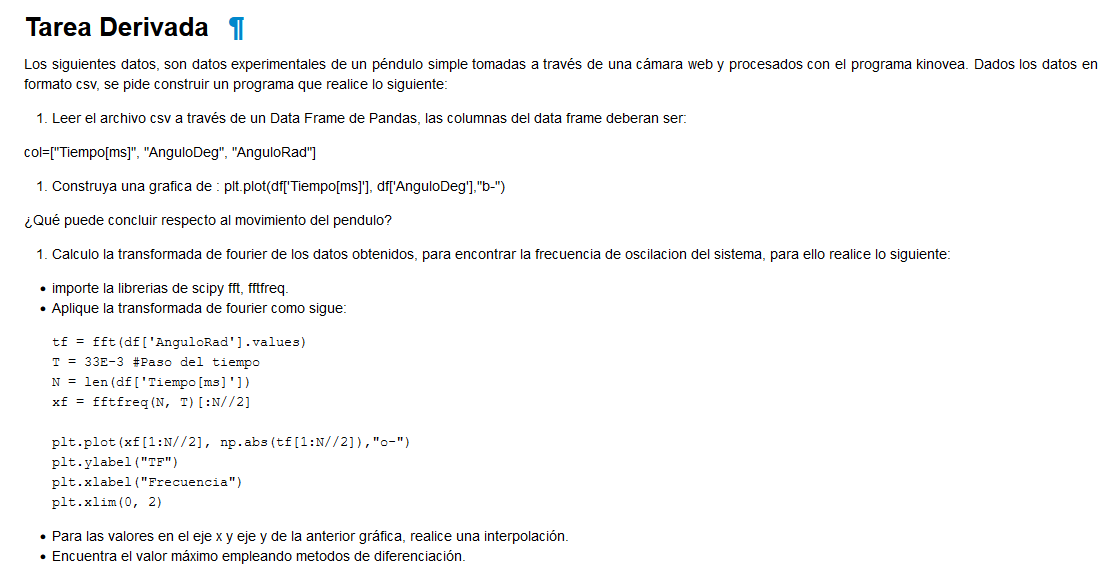

In [ ]:

""" Datos importados de google drive con pandas"""


data = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQflMX84bD1frGO-EgEhvpCxFOrSXMoMlZNw3XGVPLo_teK5tr_8eplKiCtXSAklg/pub?output=csv"
df = pd.read_csv(data,";")
df

,Tiempo (ms),"Ángulo 1,"
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [ ]:
df.columns = ['Tiempo[ms]' if x=='Tiempo (ms)' else x for x in df.columns ]  # Cambio de nombre de la columna de tiempos
df.columns = ['AnguloDeg' if x=='Ángulo 1,' else x for x in df.columns ]     # Cambio de nombre de la columna de angulos en grados
 

df['AnguloDeg'] = df['AnguloDeg'].apply(lambda x: x.replace(',','.'))      # Remplazo de , por . para leer la columna de angulos en grados como flotantes
df['AnguloDeg'] = df['AnguloDeg'].astype(float)                        # Se pasan los valores de la columna a flotantes
df['AnguloRad'] = df['AnguloDeg'].apply(lambda x: np.deg2rad(x))       # Nueva columna con los angulos en radianes 
df

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,59.289612,1.034799
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.492477,1.108153
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


Text(0.5, 0, 'Tiempo[ms]')

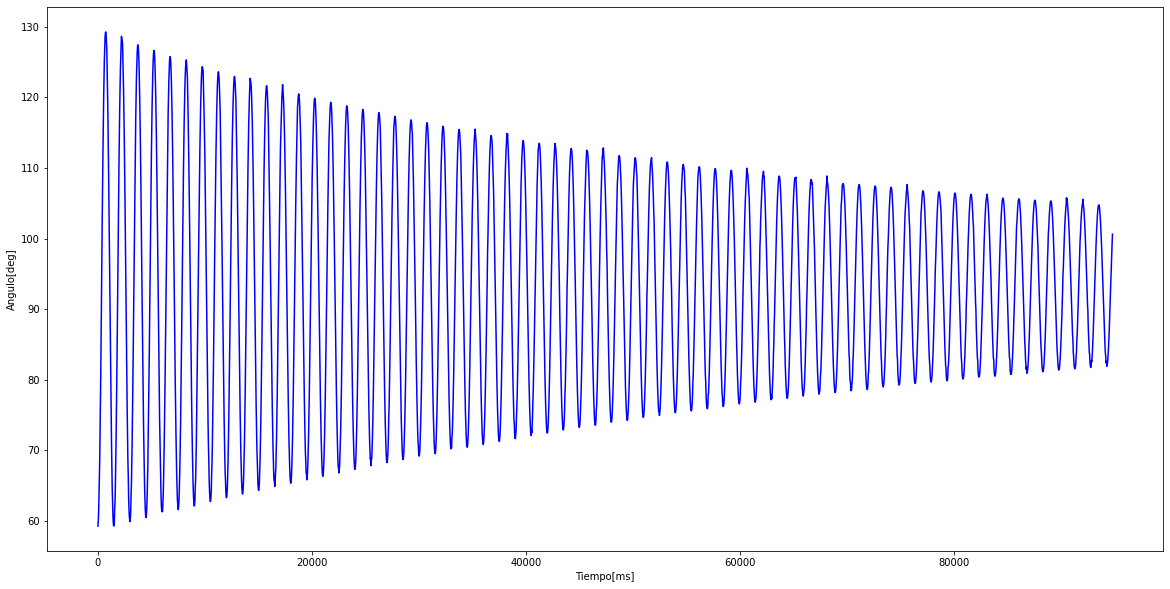

In [ ]:
""" Gráfica del angulo vs tiempo"""

plt.figure(figsize=(20,10))
plt.plot(df["Tiempo[ms]"],df["AnguloDeg"],"b-")
plt.ylabel("Angulo[deg]")
plt.xlabel("Tiempo[ms]")


Se puede concluir que el péndulo parte del reposo,sigue un movimiento armónico simple, se observa que cuando incrementa el tiempo disminuye el ángulo lo cual es acorde a la realidad considerando que el pendulo pierde energía por el rozamiento con el aire y demas factores.

In [ ]:
from scipy.fft import fft, ifft, fftfreq
tf=fft(df["AnguloRad"].values)
T= 33E-3
N=len(df["Tiempo[ms]"])
xf=fftfreq(N,T)[:N//2]

(0.0, 2.0)

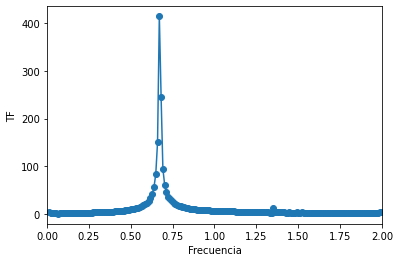

In [ ]:
plt.plot(xf[1:N//2],np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0,2)


In [ ]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

(0.25, 1.0)

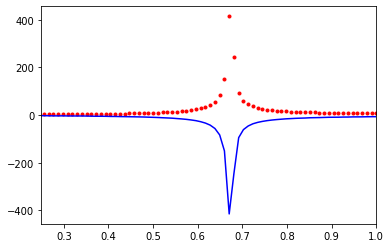

In [ ]:
""" Grafica y su reflejo en el eje x"""
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"r.")
plt.plot(abs(xf[1:N//2]), -abs(cs(xf[1:N//2])),"b" ) 
plt.xlim(0.25, 1)

In [ ]:
from scipy import optimize
poli = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2]))  # Polinomio de interpolación para hallar el maximo (mínimo)
min = optimize.fmin_powell(poli, 0.2)      # Funcion para hallar el mínimo


Optimization terminated successfully.
         Current function value: -417.867925
         Iterations: 2
         Function evaluations: 44


In [ ]:
print(" El máximo se alcanza en: %f  y su valor es de: %f" %(min,-poli(min)))

 El máximo se alcanza en: 0.671560  y su valor es de: 417.867925
